# EDA

### EXPLORING THE OUTLIER

In [16]:
import pandas as pd

In [579]:
df

,id,lama hukuman (bulan),Deskripsi
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...
2,doc_21900,18,Halaman 1 dari 20 Putusan Nomor -perkara pida...
3,doc_14859,72,"Halaman 1 dari 22 halaman, Putusan : 1. Nama ..."
4,doc_10962,60,Halaman 1 dari 20 Putusan Nomor : 1. Nama len...
...,...,...,...
16564,doc_21576,39,P U T U S A N Nomor : 1. Nama lengkap : Hadi ...
16565,doc_5391,10,"P U T U S A N Nomor , menjatuhkan Putusan seb..."
16566,doc_861,96,P U T U S A N Nomor “DEMI KEADILAN BERDASARKA...
16567,doc_15796,5,P U T U S A N Nomor : 1. Nama lengkap : MUSTO...


In [578]:
df=pd.read_csv('C:/Users/LOQ/Downloads/final_clean_data.csv')

KeyboardInterrupt: 

In [576]:
df=df.drop(columns=['Unnamed: 0'])

In [19]:
import matplotlib as plt
import seaborn as sns
import numpy as np

In [20]:
df.head()

,id,lama hukuman (bulan),Deskripsi
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...
2,doc_21900,18,Halaman 1 dari 20 Putusan Nomor -perkara pida...
3,doc_14859,72,"Halaman 1 dari 22 halaman, Putusan : 1. Nama ..."
4,doc_10962,60,Halaman 1 dari 20 Putusan Nomor : 1. Nama len...


In [23]:
df['len']=df['Deskripsi'].apply(lambda x:len(x.split()))

In [24]:
df.head()

,id,lama hukuman (bulan),Deskripsi,len
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4625
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...,9745
2,doc_21900,18,Halaman 1 dari 20 Putusan Nomor -perkara pida...,908
3,doc_14859,72,"Halaman 1 dari 22 halaman, Putusan : 1. Nama ...",6577
4,doc_10962,60,Halaman 1 dari 20 Putusan Nomor : 1. Nama len...,5732


In [27]:
data=df[['lama hukuman (bulan)','len']]

<Axes: xlabel='len', ylabel='lama hukuman (bulan)'>

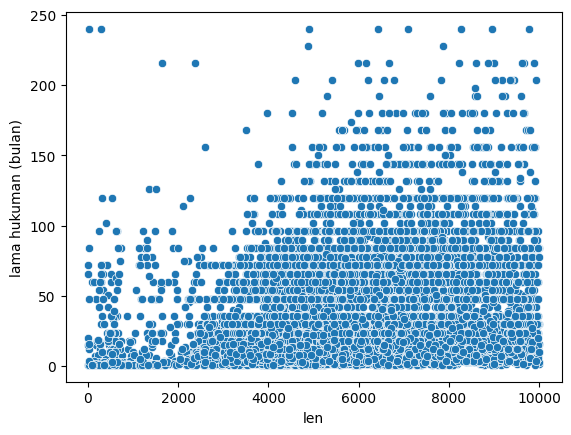

In [105]:
sns.scatterplot(data=data[data['len']<10000],x='len',y='lama hukuman (bulan)')

In [109]:
df[df['len']<1000][df['lama hukuman (bulan)']<20][df['total_keyword']>3]

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\3078193935.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['len']<1000][df['lama hukuman (bulan)']<20][df['total_keyword']>3]
C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\3078193935.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['len']<1000][df['lama hukuman (bulan)']<20][df['total_keyword']>3]


,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
14,doc_23281,1,Model: 51/Pid/PN Nomor : Nama lengkap : Andi ...,781,4,7
2470,doc_2793,1,Model: 51/Pid/PN Nomor : Nama : Alex Zainuni ...,634,3,4
3691,doc_15896,1,"CATATAN PUTUSAN Nomor , yang mengadili perkar...",673,3,4
6030,doc_17230,12,P E T I K A N P U T U S A N Nomor 2/Pid.Sus-T...,522,2,11
6759,doc_1299,3,CATATAN PUTUSAN YANG DIBUAT OLEH HAKIM PENGAD...,791,4,4
7147,doc_12798,7,Putusan Nomor : Nama lengkap : Hendri Gunawan ...,960,4,20
10433,doc_20360,3,"CATATAN SIDANG Nomor , yang memeriksa dan men...",566,3,4
13319,doc_12356,1,Catatan Putusan Nomor dari 3 Model: 51/Pid/PN...,610,3,5


In [116]:
df.drop(7147,inplace=True)

In [119]:
df['364']=df['Deskripsi'].apply(lambda x:1 if '364' in x else 0)

In [164]:
data=df[['total_keyword','lama hukuman (bulan)']]
data.corr()

,total_keyword,lama hukuman (bulan)
total_keyword,1.000000,0.461253
lama hukuman (bulan),0.461253,1.000000


<Axes: xlabel='total_keyword', ylabel='lama hukuman (bulan)'>

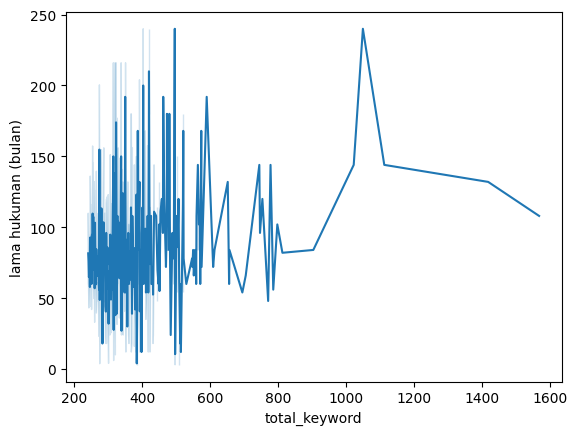

In [156]:
sns.lineplot(data[data['total_keyword']>240],x='total_keyword',y='lama hukuman (bulan)')

In [161]:
data[data['total_keyword']<300].sort_values(by='lama hukuman (bulan)',ascending=False)

,total_keyword,lama hukuman (bulan)
13341,7,240
1760,3,240
5132,265,240
7207,274,240
5171,28,240
...,...,...
10287,21,1
3467,0,1
5851,0,1
16501,4,1


In [ ]:
miss_index=[6043]
df.drop(miss_index,inplace=True)

KeyError: '[6043] not found in axis'

In [ ]:
df.drop(columns='364',inplace=True)

In [100]:
index_target=[52,961,1953,2225,3602,4301,5462,7406,7610,9511,11601,13267,13496]

In [103]:
df.drop(index_target,inplace=True)

In [ ]:
dfata

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4625,4,15
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...,9745,5,51
2,doc_21900,18,Halaman 1 dari 20 Putusan Nomor -perkara pida...,908,3,0
3,doc_14859,72,"Halaman 1 dari 22 halaman, Putusan : 1. Nama ...",6577,5,76
4,doc_10962,60,Halaman 1 dari 20 Putusan Nomor : 1. Nama len...,5732,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,P U T U S A N Nomor : 1. Nama lengkap : Hadi ...,4997,6,86
16565,doc_5391,10,"P U T U S A N Nomor , menjatuhkan Putusan seb...",3566,3,5
16566,doc_861,96,P U T U S A N Nomor “DEMI KEADILAN BERDASARKA...,8321,2,1
16567,doc_15796,5,P U T U S A N Nomor : 1. Nama lengkap : MUSTO...,5624,3,0


##### MENCARI KEYWORD

In [30]:
keyword=[
    'narkotika','narkoba','sabu','ganja',
    'psikotropika','obat keras','pil koplo',
    'membunuh','pembunuhan','bunuh','dibunuh',
    'pencurian','curi','mencuri',
    'pencabulan','cabuli','pemerkosaan','perkosa',
    'perampokan','merampok','rampok','dirampok'
    'korupsi','koruptor','suap','gratifikasi',
    'terorisme','teroris','bom',
    'penganiayaan','aniaya','aniaya','dianiaya',
    'penggelapan','gelapkan','menggelapkan',
    'perdagangan orang','trafficking',
    'pencucian uang','money laundering',
    'pemalsuan','palsu',
    'penipuan','tipu',
    'penggelapan','gelap',
    'pencurian','penipuan','perampokan',
    'pembunuhan','penganiayaan','pemerkosaan',
    'korupsi','terorisme','narkotika',
    'pencabulan','perdagangan orang','pencucian uang',
    'mencuri','membunuh','merampok',
    'menipu','menggelapkan','memalsukan',
    'suap','gratifikasi','bom',
    'sabu','ganja','pil koplo',
    'obat keras','psikotropika',
    'narkoba','teroris','trafficking',
    'money laundering','koruptor','korupsi'
]

In [31]:
def keyword_count(text):
    text=text.lower()
    count=0
    for word in keyword:
        if word in text:
            count+=1
    return count

In [32]:
df['keyword_count']=df['Deskripsi'].apply(keyword_count)

In [34]:
def total_keyword(text):
    sum=0
    text=text.lower()
    for word in text.split():
        if word in keyword:
            sum+=1
    return sum

In [35]:
df['total_keyword']=df['Deskripsi'].apply(total_keyword)

In [36]:
df.head()

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4625,4,15
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...,9745,5,51
2,doc_21900,18,Halaman 1 dari 20 Putusan Nomor -perkara pida...,908,3,0
3,doc_14859,72,"Halaman 1 dari 22 halaman, Putusan : 1. Nama ...",6577,5,76
4,doc_10962,60,Halaman 1 dari 20 Putusan Nomor : 1. Nama len...,5732,7,128


In [42]:
df

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4625,4,15
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...,9745,5,51
2,doc_21900,18,Halaman 1 dari 20 Putusan Nomor -perkara pida...,908,3,0
3,doc_14859,72,"Halaman 1 dari 22 halaman, Putusan : 1. Nama ...",6577,5,76
4,doc_10962,60,Halaman 1 dari 20 Putusan Nomor : 1. Nama len...,5732,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,P U T U S A N Nomor : 1. Nama lengkap : Hadi ...,4997,6,86
16565,doc_5391,10,"P U T U S A N Nomor , menjatuhkan Putusan seb...",3566,3,5
16566,doc_861,96,P U T U S A N Nomor “DEMI KEADILAN BERDASARKA...,8321,2,1
16567,doc_15796,5,P U T U S A N Nomor : 1. Nama lengkap : MUSTO...,5624,3,0


In [165]:
numerical_features=['len','keyword_count','total_keyword','lama hukuman (bulan)']

In [166]:
df[numerical_features].corr()

,len,keyword_count,total_keyword,lama hukuman (bulan)
len,1.000000,0.229814,0.155819,0.110493
keyword_count,0.229814,1.000000,0.402414,0.302220
total_keyword,0.155819,0.402414,1.000000,0.461253
lama hukuman (bulan),0.110493,0.302220,0.461253,1.000000


In [167]:
clean_id_1=df['id']

In [170]:
clean_id_1.to_csv('C:/Users/LOQ/Downloads/clean_id_1.csv',index=False)

<Axes: xlabel='lama hukuman (bulan)'>

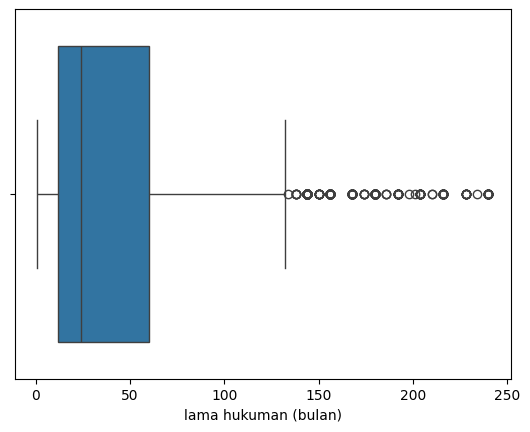

In [310]:
sns.boxplot(x=data['lama hukuman (bulan)'])

In [237]:
data['keyword_per_lama']=data['total_keyword']/data['lama hukuman (bulan)']

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\3998285227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['keyword_per_lama']=data['total_keyword']/data['lama hukuman (bulan)']


In [242]:
df

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4625,4,15
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...,9745,5,51
2,doc_21900,18,Halaman 1 dari 20 Putusan Nomor -perkara pida...,908,3,0
3,doc_14859,72,"Halaman 1 dari 22 halaman, Putusan : 1. Nama ...",6577,5,76
4,doc_10962,60,Halaman 1 dari 20 Putusan Nomor : 1. Nama len...,5732,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,P U T U S A N Nomor : 1. Nama lengkap : Hadi ...,4997,6,86
16565,doc_5391,10,"P U T U S A N Nomor , menjatuhkan Putusan seb...",3566,3,5
16566,doc_861,96,P U T U S A N Nomor “DEMI KEADILAN BERDASARKA...,8321,2,1
16567,doc_15796,5,P U T U S A N Nomor : 1. Nama lengkap : MUSTO...,5624,3,0


In [344]:
data=df[['lama hukuman (bulan)','len','total_keyword','keyword_count']]

In [346]:
data[data['len']<400].sort_values(by='len',ascending=False)

,lama hukuman (bulan),len,total_keyword,keyword_count


In [425]:
q1=df['len'].quantile(0.25)
q3=df['len'].quantile(0.95)
iqr=q3-q1
upper_bound=q3+1.5*iqr
lower_bound=q1-1.5*iqr
q3

np.float64(15926.949999999995)

In [435]:
p_99 = df['len'].quantile(0.96)
p_99_5 = df['len'].quantile(0.995)
p_99_9 = df['len'].quantile(0.999)

print(f"Batas untuk mempertahankan 99% data (persentil ke-99): {p_99:.0f} kata")
print(f"Batas untuk mempertahankan 99.5% data (persentil ke-99.5): {p_99_5:.0f} kata")
print(f"Batas untuk mempertahankan 99.9% data (persentil ke-99.9): {p_99_9:.0f} kata")

Batas untuk mempertahankan 99% data (persentil ke-99): 17770 kata
Batas untuk mempertahankan 99.5% data (persentil ke-99.5): 86716 kata
Batas untuk mempertahankan 99.9% data (persentil ke-99.9): 144764 kata


In [442]:
df

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4625,4,15
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...,9745,5,51
2,doc_21900,18,Halaman 1 dari 20 Putusan Nomor -perkara pida...,908,3,0
3,doc_14859,72,"Halaman 1 dari 22 halaman, Putusan : 1. Nama ...",6577,5,76
4,doc_10962,60,Halaman 1 dari 20 Putusan Nomor : 1. Nama len...,5732,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,P U T U S A N Nomor : 1. Nama lengkap : Hadi ...,4997,6,86
16565,doc_5391,10,"P U T U S A N Nomor , menjatuhkan Putusan seb...",3566,3,5
16566,doc_861,96,P U T U S A N Nomor “DEMI KEADILAN BERDASARKA...,8321,2,1
16567,doc_15796,5,P U T U S A N Nomor : 1. Nama lengkap : MUSTO...,5624,3,0


In [ ]:
repetitive_str=[
    'Halaman',
    'halaman',
    'P E T I K A N P U T U S A N',
    'Hal',
    ''
]

In [448]:
df=df[df['len']<18000]


In [423]:
# Berapa persentase data yang diwakili oleh 15.500 baris?
persentase_dijaga = 15500 / 16500 
# -> sekitar 0.939 atau persentil ke-94

# Anda bisa membandingkan batas atas IQR dengan batas atas persentil ke-94
batas_atas_iqr = df['len'].quantile(0.75) + 1.5 * (df['len'].quantile(0.75) - df['len'].quantile(0.25))
batas_atas_persentil_94 = df['len'].quantile(0.94)

print(f"Batas Atas IQR: {batas_atas_iqr}")
print(f"Batas Atas Persentil 94: {batas_atas_persentil_94}")

Batas Atas IQR: 14580.875
Batas Atas Persentil 94: 14837.0


In [368]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

ValueError: '' is not a valid color value.

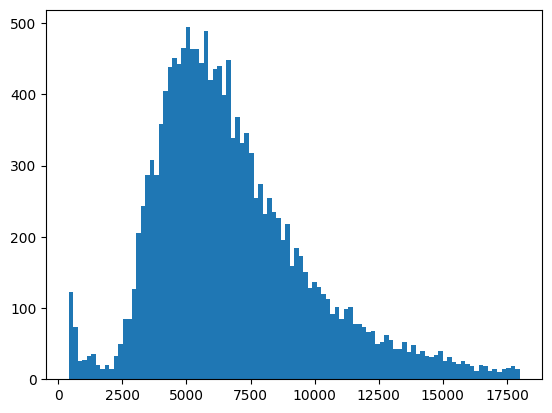

In [452]:

ax=df['len'].plot(kind='hist', bins=100, edgecolor='')
ax.set_xlim(0,30000)

(0.0, 1000.0)

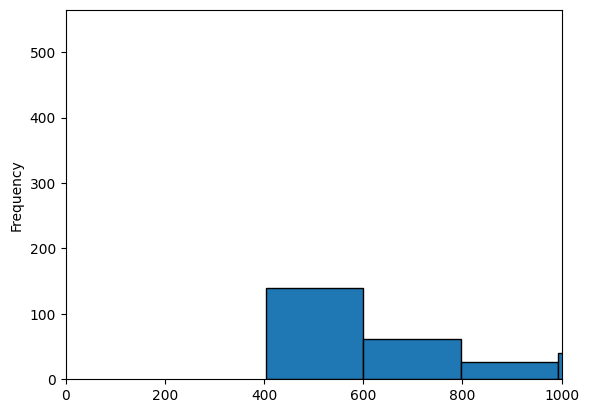

In [401]:

ax=df['len'].plot(kind='hist', bins=2000, edgecolor='black')
ax.set_xlim(0,1000)

In [ ]:
df[df['len']<1000].sort_values(by='lama hukuman (bulan)',ascending=False)


,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
14823,doc_15252,120,Halaman 1 dari 25. Putusan Nomor : : : 1. Nam...,539,4,4
359,doc_518,102,P E T I K A N P U T U S A N Nomor : Nama leng...,403,2,1
6493,doc_18045,96,Halaman 1 dari 32 Putusan Nomor : Nama Lengka...,645,2,5
12919,doc_14351,96,PETIKAN PUTUSAN Nomor 1/Pid.Sus-TPK/2025/PN.J...,630,2,13
15688,doc_17023,96,PETIKAN PUTUSAN Nomor 1/Pid.Sus-TPK/2025/PN.J...,630,2,13
...,...,...,...,...,...,...
14732,doc_13613,1,"CATATAN SIDANG Nomor , yang memeriksa dan men...",535,3,1
14473,doc_12047,1,NOMOR 37 / Pid. C/ 20 23 / PN Lgs Cacatan dar...,828,1,0
15339,doc_21311,1,Catatan Sidang yang dibuat oleh Hakim Pengadi...,738,4,2
15486,doc_17335,1,PENGADILAN NEGERI PASIR PENGARAIAN Model :08/...,475,0,0


In [409]:
'Halaman 1 dari 25' in df['Deskripsi'][14823]

True

In [ ]:
P E T I K A N P U T U S A N
Halaman 1 dari 2

' PETIKAN PUTUSAN Nomor 1/Pid.Sus-TPK/2025/PN.Jkt.Pst DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA ESA Pengadilan Tindak Pidana Korupsi pada Pengadilan Negeri Jakarta Pusat yang memeriksa dan mengadili perkara Tindak Pidana Korupsi pada peradilan Tingkat Pertama dengan acara pemeriksaan biasa telah menjatuhkan putusan sebagai berikut, dalam perkara Terdakwa: Nama lengkap : H E R M A N; Tempat lahir : Riau; Umur/ tgl. lahir : 66 Tahun / 1 Mret 1958; Jenis kelamin : Laki-laki; Kebangsaan : Indonesia; Agama : Islam; Tempat tinggal : Jalan Pinang Merah II No.37 Taman Yasmin Sektor VI Rt.04 Rw.09, Kel. Curug Mekar, Kec. Bandung Barat, Kota Bogor; Pekerjaan : Pensiunan BUMN; Pendidikan : S-1 (Ekonomi) Terdakwa ditahan dalam Rumah Tahanan Negara (Rutan) oleh ; 1. Penyidik sejak tanggal 29 Mei 2024 sampai dengan tanggal 17 Juni 2024; 2. Penyidik diperpanjangan oleh Penuntut Umum, sejak tanggal 18 Juni 2024 sampai dengan tanggal 27 Juli 2024 ; 3. Penyidik diperpanjangan pertama oleh Ketua Pengadilan Tindak Pidana Korupsi Jakarta, sejak tanggal 28 Juli 2024 sampai dengan tanggal 26 Agustus 2024; 4. Penyidik diperpanjangan kedua oleh Ketua Pengadilan Tindak Pidana Korupsi Jakarta, sejak tanggal 27 Agustus 2024 sampai dengan tanggal 25 September 2024; 5. Penuntut Umum sejak tanggal 24 September 2024 sampai dengan 13 Oktober 2024; 6. Penuntut Umum diperpanjang oleh Ketua Pengadilan Tindak Pidana Korupsi Jakarta pertama sejak tanggal 14 Oktober 2024 sampai dengan 12 November 2024; Halaman 1 Petikan Putusan perkara Nomor 1/Pid.Sus-TPK/2025/PN.Jkt.Pst.   Halaman 1                7. Penuntut Umum diperpanjang oleh Ketua Pengadilan Tindak Pidana Korupsi Jakarta kedua sejak tanggal 13 November 2024 sampai dengan 12 Desember 2024; 8. Penuntut Umum diperpanjang oleh Ketua Pengadilan Tindak Pidana Korupsi Jakarta ketiga sejak tanggal 13 Desember 2024 sampai dengan 11 Januari 2025; 9. Hakim Ketua Majelis Pengadilan Tindak Pidana Korupsi pada Pengadilan Negeri Jakarta Pusat sejak tanggal 6 Januari 2025 sampai dengan tanggal 4 Februari 2025; 10. Hakim Ketua Majelis diperpanjang oleh Ketua Pengadilan Tindak Pidana Korupsi Jakarta, sejak tanggal 5 Februari 2025 sampai dengan tanggal 5 April 2025; 11. Hakim Ketua Majelis diperpanjangan Pertama oleh Ketua Pengadilan Tinggi DKI Jakarta, sejak tanggal 6 April 2025 sampai dengan tanggal 5 Mei 2025; 12. Hakim Ketua Majelis perpanjangan Kedua oleh Ketua Pengadilan Tinggi DKI Jakarta, sejak tanggal 6 Mei 2025 sampai dengan tanggal 4 Juni 2025; Terdakwa di persidangan didampingi oleh Fernandes Raja Saor, S.H., M.H., Putri nIra Chaerani Dompas, S.H.,M.H., Ahmad Firdaus Syahrul, S.H.,M.H., Glenn Dio Haeckal Anggoro, S.H., Keke A. Yuningtias, S.H., Asima Rospita, S.H., Jesaya Posma Anugerah Saragih, S.H., Jane Caroline Mapaliey, S.H., Ali Al Uraidy, S.H., Rocky F.J. Pinem, S.H., David Brian Kaniga, S.H. dan Albert Timbul Brilian, S.H., para Advocat dan/atau Konsultan Hukum pada Kantor Hukum Fernandes Partnership, beralamat di Gedung Bursa Efek Indonesia, Lantai 17, Menara 2, Jalan Jenderal Sudirman Kav.52-53, Jakarta Selatan, DKI Jakarta 12190, berdasarkan Surat Kuasa Khusus tanggal 08 Januari 2025 yang telah didaftarkan di Kepaniteraan Pengadilan Negeri Jakarta Pusat Kelas IA Khusus Nomor Reg.21 tanggal 13 Januari 2025; Pengadilan Tindak Pidana Korupsi tersebut; Setelah membaca : - Penetapan Ketua Pengadilan Tindak Pidana Korupsi pada Pengadilan Negeri Jakarta Pusat Nomor 1/Pid.Sus-TPK/2025/PN.Jkt.Pst., tanggal 6 Januari 2025 dan 15 April 2025, tentang penunjukan Majelis Hakim; Halaman 2 Petikan Putusan perkara Nomor 1/Pid.Sus-TPK/2025/PN.Jkt.Pst.   Halaman 2                - Penetapan Ketua Majelis Pengadilan Tindak Pidana Korupsi pada Pengadilan Negeri Jakarta Pusat Nomor 1/Pid.Sus-TPK/2025/PN.Jkt.Pst., tanggal 6 Januari 2025, tentang Penetapan hari sidang; - Berkas perkara dan surat-surat lain yang bersangkutan; Setelah mendengar keterangan saksi-saksi, ahli dan Terdakwa serta memperhatikan barang bukti yang diajukan dipersidangan; Memperhatikan ketentuan Pasal 2 ayat (1) Jo. Pasal 18 Undang- Undang R.I Nomor 31 Tahun 1999 Tentang Pemberantasan Tindak Pidana Korupsi, sebagaimana telah diubah dan ditambah dengan Undang-undang Nomor 20 Tahun 2001, Tentang Perubahan atas Undang-Undang Nomor 31 Tahun 1999 tentang Pemberantasan Tindak Pidana Korupsi Jo Pasal 55 ayat (1) ke-1 KUHPidana, serta peraturan perundang-undangan lain yang bersangkutan;'

In [414]:
df.loc[12919]['Deskripsi']

' PETIKAN PUTUSAN Nomor 1/Pid.Sus-TPK/2025/PN.Jkt.Pst DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA ESA Pengadilan Tindak Pidana Korupsi pada Pengadilan Negeri Jakarta Pusat yang memeriksa dan mengadili perkara Tindak Pidana Korupsi pada peradilan Tingkat Pertama dengan acara pemeriksaan biasa telah menjatuhkan putusan sebagai berikut, dalam perkara Terdakwa: Nama lengkap : H E R M A N; Tempat lahir : Riau; Umur/ tgl. lahir : 66 Tahun / 1 Mret 1958; Jenis kelamin : Laki-laki; Kebangsaan : Indonesia; Agama : Islam; Tempat tinggal : Jalan Pinang Merah II No.37 Taman Yasmin Sektor VI Rt.04 Rw.09, Kel. Curug Mekar, Kec. Bandung Barat, Kota Bogor; Pekerjaan : Pensiunan BUMN; Pendidikan : S-1 (Ekonomi) Terdakwa ditahan dalam Rumah Tahanan Negara (Rutan) oleh ; 1. Penyidik sejak tanggal 29 Mei 2024 sampai dengan tanggal 17 Juni 2024; 2. Penyidik diperpanjangan oleh Penuntut Umum, sejak tanggal 18 Juni 2024 sampai dengan tanggal 27 Juli 2024 ; 3. Penyidik diperpanjangan pertama oleh Ketua Peng

In [418]:
upper_data=df[df['len']>upper_bound]

In [419]:
upper_data

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
33,doc_1534,108,P U T U S A N Nomor 44/Pid.Sus-TPK/2023/PN PB...,224704,11,120
54,doc_18689,144,P U T U S A N Nomor : 1. Nama lengkap : Irawa...,26920,8,196
75,doc_11342,54,P U T U S A N Nomor : 1. Nama lengkap : W.N. ...,45421,12,47
86,doc_14817,60,P U T U S A N Nomor : 1. Nama lengkap : JAMBR...,34157,7,25
212,doc_13401,82,Halaman 1 dari 79 Putusan Nomor:: Nama lengka...,25184,7,813
...,...,...,...,...,...,...
16315,doc_4737,54,P U T U S A N Nomor 12/Pid.Sus-TPK/2021/PN Pl...,32726,5,39
16359,doc_13950,12,P U T U S A N Nomor : 1. Nama lengkap : Maria...,35974,6,159
16426,doc_8756,36,Halaman 1 dari 88 hal Putusan Nomor ; Nama le...,23772,9,61
16443,doc_8111,12,Hal 1 dari 162 Putusan No.18/Pid.Sus-TPK/2022...,40609,3,45


In [359]:
df.describe()

,lama hukuman (bulan),len,keyword_count,total_keyword
count,16478.000000,16478.000000,16478.000000,16478.000000
mean,40.036534,8296.243598,5.322491,61.607598
std,38.600633,11185.171776,2.974924,90.906163
min,1.000000,403.000000,0.000000,0.000000
25%,12.000000,4774.000000,4.000000,4.000000
50%,24.000000,6360.500000,5.000000,16.000000
75%,60.000000,8696.750000,7.000000,96.000000
max,240.000000,393990.000000,34.000000,1569.000000


<Axes: xlabel='len'>

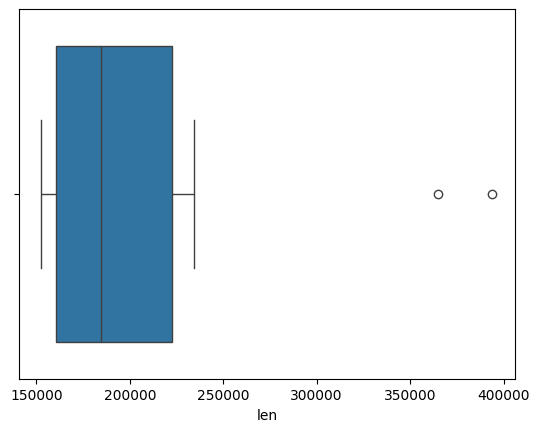

In [ ]:
sns.boxplot(x=data['len'][)

In [339]:
df.loc[13476]['Deskripsi']

' Catatan Putusan yang dibuat oleh Hakim Pengadilan Negeri dalam Daftar Catatan perkaraPerkara (Pasal 209 ayat (2) KUHAP) No. /PID.C/2019/PN.Lht ------- Catatan dari persidangan terbuka untuk umum Pengadilan Negeri Lahat yang memeriksa dan mengadili perkara tindak pidana ringan dengan acara pemeriksaan cepat, dalam perkara ; ----------------------------------------------------------- Nama lengkap : YUNNI Binti NUR MUHAMMAD (Alm) Tempat lahir : Muara Lawai Umur/tanggal lahir : 51 Tahun/14 Maret 1968 Jenis kelamin : Perempuan Kebangsaan : Indonesia Tempat tinggal : Jl. KI Mangku Lr. Asli No. 419 RT/RW 010/003 Kel. Sentosa Kec. SU II Kota Palembang Agama : Islam. Pekerjaan : Mengurus Rumah Tangga Terdakwa Tidak di tahan ; ------------------------------------------------------------------------ SUSUNAN PERSIDANGAN : -------------------------------------------------------------------- SAIFUL BROW, S.H. : Hakim FITRIANI, S.H. : Panitera Pengganti Penyidik membacakan laporan Polisi dengan NO.

In [341]:
wrong_index=[10744, 13845, 13758,  8168,  5808,  8138, 16058,  2754, 13073, 13476,2940,  7015,  8466, 14173, 12015,  5785,  4758, 13097, 14364, 13091]

In [342]:
df.drop(wrong_index,inplace=True)

In [343]:
df

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4625,4,15
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...,9745,5,51
2,doc_21900,18,Halaman 1 dari 20 Putusan Nomor -perkara pida...,908,3,0
3,doc_14859,72,"Halaman 1 dari 22 halaman, Putusan : 1. Nama ...",6577,5,76
4,doc_10962,60,Halaman 1 dari 20 Putusan Nomor : 1. Nama len...,5732,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,P U T U S A N Nomor : 1. Nama lengkap : Hadi ...,4997,6,86
16565,doc_5391,10,"P U T U S A N Nomor , menjatuhkan Putusan seb...",3566,3,5
16566,doc_861,96,P U T U S A N Nomor “DEMI KEADILAN BERDASARKA...,8321,2,1
16567,doc_15796,5,P U T U S A N Nomor : 1. Nama lengkap : MUSTO...,5624,3,0


##### HANDLE REPETITIVE WORD

In [453]:
df

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4625,4,15
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...,9745,5,51
2,doc_21900,18,Halaman 1 dari 20 Putusan Nomor -perkara pida...,908,3,0
3,doc_14859,72,"Halaman 1 dari 22 halaman, Putusan : 1. Nama ...",6577,5,76
4,doc_10962,60,Halaman 1 dari 20 Putusan Nomor : 1. Nama len...,5732,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,P U T U S A N Nomor : 1. Nama lengkap : Hadi ...,4997,6,86
16565,doc_5391,10,"P U T U S A N Nomor , menjatuhkan Putusan seb...",3566,3,5
16566,doc_861,96,P U T U S A N Nomor “DEMI KEADILAN BERDASARKA...,8321,2,1
16567,doc_15796,5,P U T U S A N Nomor : 1. Nama lengkap : MUSTO...,5624,3,0


In [474]:
pola_kuat = r'\s*Halaman\s+\d+\s+dari\s+\d+\s*'
df['Deskripsi'] = df['Deskripsi'].str.replace(pola_kuat, '', regex=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\2629133981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deskripsi'] = df['Deskripsi'].str.replace(pola_kuat, '', regex=True)


In [475]:
df

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4625,4,15
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...,9745,5,51
2,doc_21900,18,Putusan Nomor -perkara pidana dengan acara pem...,908,3,0
3,doc_14859,72,"halaman, Putusan : 1. Nama lengkap : Daimon Da...",6577,5,76
4,doc_10962,60,Putusan Nomor : 1. Nama lengkap : Samsul Afriz...,5732,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,P U T U S A N Nomor : 1. Nama lengkap : Hadi ...,4997,6,86
16565,doc_5391,10,"P U T U S A N Nomor , menjatuhkan Putusan seb...",3566,3,5
16566,doc_861,96,P U T U S A N Nomor “DEMI KEADILAN BERDASARKA...,8321,2,1
16567,doc_15796,5,P U T U S A N Nomor : 1. Nama lengkap : MUSTO...,5624,3,0


In [495]:
numerical_features=['len','keyword_count','total_keyword','lama hukuman (bulan)']
data=df[numerical_features]

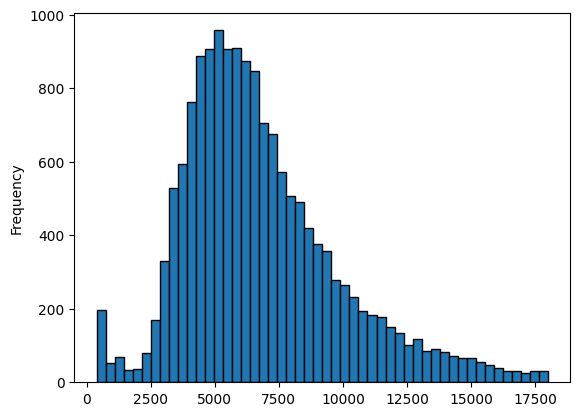

In [483]:
ax=data['len'].plot(kind='hist', bins=50, edgecolor='black')

In [488]:
pola_kuat_2= r'halaman \d+'
df['Deskripsi'] = df['Deskripsi'].str.replace(pola_kuat_2, '', regex=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\2212860754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deskripsi'] = df['Deskripsi'].str.replace(pola_kuat_2, '', regex=True)


In [486]:
df

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4625,4,15
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...,9745,5,51
2,doc_21900,18,Putusan Nomor -perkara pidana dengan acara pem...,908,3,0
3,doc_14859,72,"halaman, Putusan : 1. Nama lengkap : Daimon Da...",6577,5,76
4,doc_10962,60,Putusan Nomor : 1. Nama lengkap : Samsul Afriz...,5732,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,P U T U S A N Nomor : 1. Nama lengkap : Hadi ...,4997,6,86
16565,doc_5391,10,"P U T U S A N Nomor , menjatuhkan Putusan seb...",3566,3,5
16566,doc_861,96,P U T U S A N Nomor “DEMI KEADILAN BERDASARKA...,8321,2,1
16567,doc_15796,5,P U T U S A N Nomor : 1. Nama lengkap : MUSTO...,5624,3,0


In [492]:
df['Deskripsi'] = df['Deskripsi'].str.replace(r'\s+', ' ', regex=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\2919710228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deskripsi'] = df['Deskripsi'].str.replace(r'\s+', ' ', regex=True)


In [491]:
df.drop(columns='Deskripsi_bersih',inplace=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\1222291421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Deskripsi_bersih',inplace=True)


In [493]:
df['len']=df['Deskripsi'].apply(lambda x:len(x.split()))

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\2049730077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['len']=df['Deskripsi'].apply(lambda x:len(x.split()))


In [504]:
data.corr()

,len,keyword_count,total_keyword,lama hukuman (bulan),total_keyword per len
len,1.000000,0.240214,0.373652,0.289319,0.139824
keyword_count,0.240214,1.000000,0.435868,0.306600,0.445260
total_keyword,0.373652,0.435868,1.000000,0.467347,0.907950
lama hukuman (bulan),0.289319,0.306600,0.467347,1.000000,0.463242
total_keyword per len,0.139824,0.445260,0.907950,0.463242,1.000000


In [503]:
data['total_keyword per len']=data['total_keyword']/data['len']

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\1686310447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_keyword per len']=data['total_keyword']/data['len']


<Axes: xlabel='total_keyword', ylabel='lama hukuman (bulan)'>

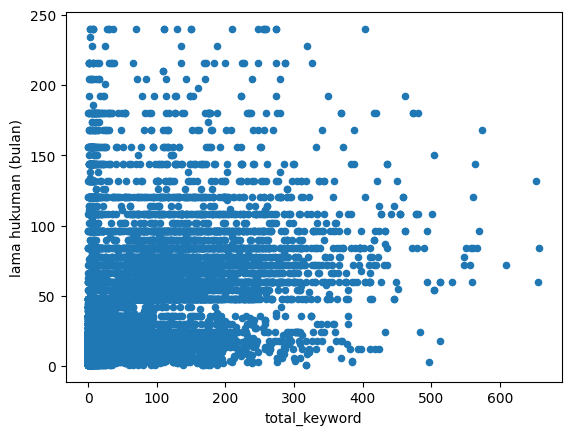

In [501]:
data.plot(kind='scatter',x='total_keyword',y='lama hukuman (bulan)')

In [505]:
df

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4595,4,15
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...,9549,5,51
2,doc_21900,18,Putusan Nomor -perkara pidana dengan acara pem...,886,3,0
3,doc_14859,72,"halaman, Putusan : 1. Nama lengkap : Daimon Da...",6453,5,76
4,doc_10962,60,Putusan Nomor : 1. Nama lengkap : Samsul Afriz...,5620,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,P U T U S A N Nomor : 1. Nama lengkap : Hadi ...,4885,6,86
16565,doc_5391,10,"P U T U S A N Nomor , menjatuhkan Putusan seb...",3496,3,5
16566,doc_861,96,P U T U S A N Nomor “DEMI KEADILAN BERDASARKA...,8160,2,1
16567,doc_15796,5,P U T U S A N Nomor : 1. Nama lengkap : MUSTO...,5497,3,0


In [510]:
df['Deskripsi']=df['Deskripsi'].str.replace(r'P U T U S A N Nomor : \d+', ' ', regex=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\2859426275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deskripsi']=df['Deskripsi'].str.replace(r'P U T U S A N Nomor : \d+', ' ', regex=True)


In [533]:
def bersihkan_teks_awal(teks):
    # # Hapus titik dan angka di awal
    # teks = re.sub(r'^[.\d\s]+', '', teks)
    # # Hapus pola ID dokumen
    # teks = re.sub(r'doc_\d+', '', teks)
    # # Hapus 'P U T U S A N Nomor' yang mungkin tersisa
    # teks = re.sub(r'P U T U S A N Nomor', '', teks, flags=re.IGNORECASE)
    # # Hapus spasi berlebih yang mungkin muncul
    # teks = re.sub(r'\s+', ' ', teks).strip()
    teks_bersih = re.sub(r'^[.\d\s]+', '', teks)

    return teks_bersih


In [523]:
df['Deskripsi'] = df['Deskripsi'].str.replace(r'halaman', '', regex=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\836089598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deskripsi'] = df['Deskripsi'].str.replace(r'halaman', '', regex=True)


In [525]:
df['len']=df['Deskripsi'].apply(lambda x:len(x.split()))

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\2049730077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['len']=df['Deskripsi'].apply(lambda x:len(x.split()))


In [534]:
df['Deskripsi']=df['Deskripsi'].apply(bersihkan_teks_awal)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\748972136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deskripsi']=df['Deskripsi'].apply(bersihkan_teks_awal)


In [535]:
df

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4595,4,15
1,doc_14914,60,Nama lengkap : LUKAS REGOY 2. Tempat lahir : Y...,9539,5,51
2,doc_21900,18,Putusan Nomor -perkara pidana dengan acara pem...,886,3,0
3,doc_14859,72,Putusan : 1. Nama lengkap : Daimon David Maman...,6453,5,76
4,doc_10962,60,Putusan Nomor : 1. Nama lengkap : Samsul Afriz...,5619,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,Nama lengkap : Hadi Ramadana Alias Dana Bin Mu...,4875,6,86
16565,doc_5391,10,menjatuhkan Putusan sebagai berikut dalam perk...,3487,3,5
16566,doc_861,96,“DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA...,8152,2,1
16567,doc_15796,5,Nama lengkap : MUSTOFA Bin Alm. MOH. SA'ID; 2....,5487,3,0


In [536]:
data=df[numerical_features]

In [537]:
data.corr()

,len,keyword_count,total_keyword,lama hukuman (bulan)
len,1.000000,0.240247,0.373809,0.289423
keyword_count,0.240247,1.000000,0.435868,0.306600
total_keyword,0.373809,0.435868,1.000000,0.467347
lama hukuman (bulan),0.289423,0.306600,0.467347,1.000000


(0.0, 20.0)

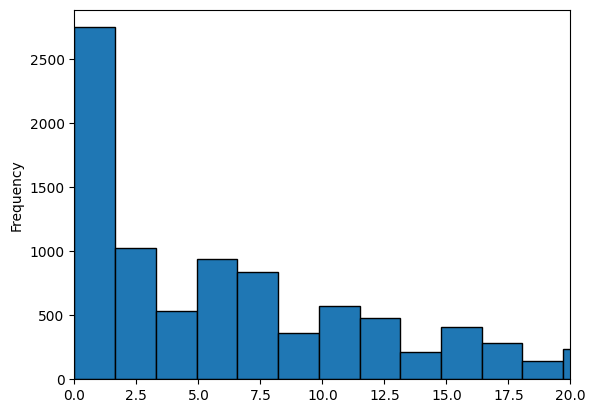

In [555]:
ax=data['total_keyword'].plot(kind='hist', bins=400, edgecolor='black')
ax.set_xlim(0,20)

In [556]:
df.describe()

,lama hukuman (bulan),len,keyword_count,total_keyword
count,15840.000000,15840.000000,15840.000000,15840.000000
mean,39.359596,6672.234091,5.230114,59.234848
std,37.631760,2991.284968,2.805862,83.516777
min,1.000000,388.000000,0.000000,0.000000
25%,12.000000,4613.000000,4.000000,4.000000
50%,24.000000,6106.000000,5.000000,15.000000
75%,60.000000,8177.500000,7.000000,96.000000
max,240.000000,17860.000000,26.000000,657.000000


In [557]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Siapkan Data Anda (Contoh Dokumen)
# Dalam kasus Anda, ini bisa berupa list atau Series pandas dari kolom 'Deskripsi'
corpus = df['Deskripsi']

# 2. Inisialisasi TfidfVectorizer
# TfidfVectorizer akan melakukan semua perhitungan untuk Anda:
# - Tokenisasi (memecah kalimat menjadi kata)
# - Menghitung Term Frequency (TF)
# - Menghitung Inverse Document Frequency (IDF)
vectorizer = TfidfVectorizer(stop_words='english') # Anda bisa mengganti dengan daftar stop words Bahasa Indonesia

# 3. Ubah Teks menjadi Matriks TF-IDF
# .fit_transform() mempelajari kosakata dari korpus dan mengubah korpus menjadi matriks
tfidf_matrix = vectorizer.fit_transform(corpus)

# 4. (Opsional) Tampilkan Hasil dalam DataFrame agar Mudah Dibaca
# Dapatkan nama-nama fitur (kata-kata dalam kosakata)
feature_names = vectorizer.get_feature_names_out()

# Buat DataFrame dari matriks TF-IDF
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

print("--- Matriks TF-IDF ---")
print(df_tfidf)

# 5. Ekstrak Kata Kunci Teratas untuk Setiap Dokumen
def get_top_keywords(doc_index, n=3):
    """Fungsi untuk mendapatkan n kata kunci teratas dari sebuah dokumen."""
    # Ambil skor TF-IDF untuk dokumen yang dipilih
    tfidf_scores = df_tfidf.iloc[doc_index]
    # Urutkan skor dari yang tertinggi dan ambil n teratas
    top_keywords = tfidf_scores.sort_values(ascending=False).head(n)
    return top_keywords

print("\n--- Kata Kunci Teratas per Dokumen ---")

# Tampilkan kata kunci teratas untuk setiap dokumen dalam korpus
for i in range(len(corpus)):
    print(f"\nDokumen {i+1}: '{corpus[i]}'")
    print(get_top_keywords(i))

MemoryError: Unable to allocate 34.1 GiB for an array with shape (15840, 289233) and data type float64

In [558]:
df

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4595,4,15
1,doc_14914,60,Nama lengkap : LUKAS REGOY 2. Tempat lahir : Y...,9539,5,51
2,doc_21900,18,Putusan Nomor -perkara pidana dengan acara pem...,886,3,0
3,doc_14859,72,Putusan : 1. Nama lengkap : Daimon David Maman...,6453,5,76
4,doc_10962,60,Putusan Nomor : 1. Nama lengkap : Samsul Afriz...,5619,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,Nama lengkap : Hadi Ramadana Alias Dana Bin Mu...,4875,6,86
16565,doc_5391,10,menjatuhkan Putusan sebagai berikut dalam perk...,3487,3,5
16566,doc_861,96,“DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA...,8152,2,1
16567,doc_15796,5,Nama lengkap : MUSTOFA Bin Alm. MOH. SA'ID; 2....,5487,3,0


In [559]:
pola_nama = r'^\s*Nama lengkap\s*:.*$\n?'
df['Deskripsi']=df['Deskripsi'].str.replace(pola_nama, '', regex=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_28708\4219458309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deskripsi']=df['Deskripsi'].str.replace(pola_nama, '', regex=True)


In [560]:
df

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4595,4,15
1,doc_14914,60,,9539,5,51
2,doc_21900,18,Putusan Nomor -perkara pidana dengan acara pem...,886,3,0
3,doc_14859,72,Putusan : 1. Nama lengkap : Daimon David Maman...,6453,5,76
4,doc_10962,60,Putusan Nomor : 1. Nama lengkap : Samsul Afriz...,5619,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,,4875,6,86
16565,doc_5391,10,menjatuhkan Putusan sebagai berikut dalam perk...,3487,3,5
16566,doc_861,96,“DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA...,8152,2,1
16567,doc_15796,5,,5487,3,0


In [570]:
df=_505

In [571]:
df

,id,lama hukuman (bulan),Deskripsi,len,keyword_count,total_keyword
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...,4595,4,15
1,doc_14914,60,,9539,5,51
2,doc_21900,18,Putusan Nomor -perkara pidana dengan acara pem...,886,3,0
3,doc_14859,72,Putusan : 1. Nama lengkap : Daimon David Maman...,6453,5,76
4,doc_10962,60,Putusan Nomor : 1. Nama lengkap : Samsul Afriz...,5619,7,128
...,...,...,...,...,...,...
16564,doc_21576,39,,4875,6,86
16565,doc_5391,10,menjatuhkan Putusan sebagai berikut dalam perk...,3487,3,5
16566,doc_861,96,“DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA...,8152,2,1
16567,doc_15796,5,,5487,3,0


In [572]:
list_clean=pd.read_csv('C:/Users/LOQ/Downloads/clean_id_1.csv')

In [573]:
list_clean

,id
0,doc_13590
1,doc_14914
2,doc_21900
3,doc_14859
4,doc_10962
...,...
16549,doc_21576
16550,doc_5391
16551,doc_861
16552,doc_15796


In [590]:
list_clean.values

array([['doc_13590'],
       ['doc_14914'],
       ['doc_21900'],
       ...,
       ['doc_861'],
       ['doc_15796'],
       ['doc_23655']], shape=(16554, 1), dtype=object)

In [592]:
df=df[df['id'].isin(list_clean['id'])]

In [593]:
df

,id,lama hukuman (bulan),Deskripsi
0,doc_13590,10,Putusan Nomor : Nama lengkap : JULIANTI LAHINT...
1,doc_14914,60,P U T U S A N Nomor : 1. Nama lengkap : LUKAS...
2,doc_21900,18,Halaman 1 dari 20 Putusan Nomor -perkara pida...
3,doc_14859,72,"Halaman 1 dari 22 halaman, Putusan : 1. Nama ..."
4,doc_10962,60,Halaman 1 dari 20 Putusan Nomor : 1. Nama len...
...,...,...,...
16564,doc_21576,39,P U T U S A N Nomor : 1. Nama lengkap : Hadi ...
16565,doc_5391,10,"P U T U S A N Nomor , menjatuhkan Putusan seb..."
16566,doc_861,96,P U T U S A N Nomor “DEMI KEADILAN BERDASARKA...
16567,doc_15796,5,P U T U S A N Nomor : 1. Nama lengkap : MUSTO...


In [598]:
dummy=df.copy()

In [594]:
def bersihkan_teks_awal(teks):
    # # Hapus titik dan angka di awal
    teks = re.sub(r'^[.\d\s]+', '', teks)
    # # Hapus pola ID dokumen
    teks = re.sub(r'doc_\d+', '', teks)
    # # Hapus 'P U T U S A N Nomor' yang mungkin tersisa
    teks = re.sub(r'P U T U S A N Nomor', '', teks, flags=re.IGNORECASE)
    # # Hapus spasi berlebih yang mungkin muncul
    teks = re.sub(r'\s+', ' ', teks).strip()
    teks = re.sub(r'^[.\d\s]+', '', teks)

    return teks

In [599]:
dummy['Deskripsi']=df['Deskripsi'].apply(bersihkan_teks_awal)

In [619]:
dummy['Deskripsi']=dummy['Deskripsi'].str.replace(r'^[,\d\s]+', '', regex=True)

In [622]:
dummy['Deskripsi']=dummy['Deskripsi'].str.replace(r'^[-\d\s]+', '', regex=True)

In [617]:
dummy['Deskripsi']=dummy['Deskripsi'].str.replace(r'^[:\d\s]+', '', regex=True)

In [609]:
dummy['Deskripsi']=dummy['Deskripsi'].str.replace(r'Halaman \d+ dari \d+ halaman', '', regex=True)

In [611]:
dummy['Deskripsi']=dummy['Deskripsi'].str.replace(r'Halaman \d+ dari \d+', '', regex=True)

In [615]:
dummy['Deskripsi']=dummy['Deskripsi'].replace('Putusan Nomor', '')

In [637]:
dummy

,id,lama hukuman (bulan),Deskripsi
0,doc_13590,10,Nama lengkap : JULIANTI LAHINTA alias JURNI; N...
1,doc_14914,60,Nama lengkap : LUKAS REGOY 2. Tempat lahir : Y...
2,doc_21900,18,perkara pidana dengan acara pemeriksaan biasa ...
3,doc_14859,72,Putusan : 1. Nama lengkap : Daimon David Maman...
4,doc_10962,60,Nama lengkap : Samsul Afrizal Bin Johar Alm 2....
...,...,...,...
16564,doc_21576,39,Nama lengkap : Hadi Ramadana Alias Dana Bin Mu...
16565,doc_5391,10,menjatuhkan Putusan sebagai berikut dalam perk...
16566,doc_861,96,“DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA...
16567,doc_15796,5,Nama lengkap : MUSTOFA Bin Alm. MOH. SA'ID; 2....


In [636]:
dummy.drop(columns='Deskripsi_bersih',inplace=True)

In [662]:
def ambil_halaman_1(text):
    pola_halaman = [
        r'halaman\s*1',
        r'hal\.\s*1',
        r'halaman\s*ke-?1',
        r'Halaman\s*1',
        r'Hal\.\s*1',
        r'Halaman\s*ke-?1',
    ]
    posisi_terendah=-1
    for pola in pola_halaman:
        match = re.search(pola, text)
        if match:
            posisi = match.start()
            if posisi_terendah == -1 or posisi < posisi_terendah:
                posisi_terendah = posisi
    if posisi_terendah != -1:
        return text[posisi_terendah:].strip()
    else:
        return text

In [665]:
dummy_2=dummy.copy()
dummy_2['Deskripsi']=dummy_2['Deskripsi'].apply(ambil_halaman_1)

In [670]:
dummy_2['is_halaman_1']=dummy_2['Deskripsi'].apply(lambda x:1 if re.search(r'halaman\s*1|hal\.\s*1|halaman\s*ke-?1|Halaman\s*1|Hal\.\s*1|Halaman\s*ke-?1', x) else 0)   

In [ ]:
dummy_2['Deskripsi']=dummy_2['Deskripsi'].replace('PETIKAN PUTUSAN', '')

In [714]:
drop_index=[145,265,700,950,1205,1336,1928,3021,3467,3550,3784,4844,5120,5315,
            5854,5994,7112,7599,7841,8451,9305,9402,10396,10456,11303,11372,11820,
            12299,12839,12863,13358,14074,14279,14768,14887,15812,16144]

In [721]:
drop_index2=[10701,11007,13967,14239]

'PETIKAN PUTUSAN Nomor ; Nama lengkap : Pauji Suwito Alias Pauji; Tempat lahir : Aceh; Umur/tanggal lahir : 24 tahun/ 21 Oktober 1997; Jenis Kelamin : Laki-laki; Kebangsaan : Indonesia; Tempat tinggal : Sumber Rejo Blok 4 Dusun 6 Desa Bantan Kecamatan Dolok Masihul Kabupaten Serdang Bedagai; Agama : Islam; Pekerjaan : Tidak Tetap; Terdakwa tidak ditahan; Terdakwa tidak pernah dihukum; Terdakwa dipersidangan tidak didampingi Penasihat Hukum; Pengadilan Negeri tersebut; Membaca catatan dakwaan (Resume) beserta surat-surat bukti keterangan lainnya; Mendengar keterangan Terdakwa dan saksi-saksi; Memperhatikan barang-barang bukti; Mengingat dan memperhatikan Pasal 364 Kitab Undang-undang Hukum Pidana dan Undang-undang Nomor 8 tahun 1981 tentang Hukum Acara Pidana serta peraturan perundang-undangan lain yang bersangkutan;'

In [719]:
dummy_2.loc[14239]['Deskripsi']

'PETIKAN PUTUSAN Nomor : 85 / Pid.C/ 2021/ PN Bkn DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA ESA Pengadilan Negeri Bangkinang yang mengadili perkara pidana Ringan dalam tingkat pertama dengan acara pemeriksaan cepat telah menjatuhkan putusan sebagai berikut dalam perkara Terdakwa: Nama Lengkap : Juliana Br Nainggolan; Tempat Lahir : Sumut ; Umur / Tgl Lahir : 56 Tahun / 09 Oktober 1965 ; Jenis Kelamin : Perempuan ; Kebangsaan : Indonesia. ; Tempat Tinggal : Kota Baru Rt. 014 Rw. 004 Desa Kota Baru Kec. Tapung Hilir Kab. Kampar ; Agama : Kristen Protestan ; Pekerjaan : Mengurus Rumah Tangga ; Terdakwa tidak ditahan ; Terdakwa tidak didampingi Penasihat Hukum ; PENGADILAN NEGERI TERSEBUT ; Membaca ) Mendengar ) d.s.b Menimbang ) Mengingat dan memperhatikan Pasal 364 KUH. Pidana, dan pasal-pasal lain dari peraturan perundang-undangan yang berhubungan dengan perkara ini;'

In [722]:
dummy3=dummy3.drop(index=drop_index2)

In [723]:
dummy3[dummy3['is_halaman_1']!=1]

,id,lama hukuman (bulan),Deskripsi,is_halaman_1


In [672]:
dummy_2[dummy_2['is_halaman_1']!=1]

,id,lama hukuman (bulan),Deskripsi,is_halaman_1
145,doc_2738,1,PETIKAN PUTUSAN Nomor ; Nama lengkap : Pauji S...,0
265,doc_11608,6,PETIKAN PUTUSAN (Pasal 226 ayat 1 KUHAP) PETIK...,0
700,doc_8198,2,PETIKAN PUTUSAN Nomor: . “ DEMI KEADILAN BERDA...,0
950,doc_8171,12,“DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA...,0
1205,doc_7325,1,PETIKAN PUTUSAN Nomor ; Nama lengkap : Rendi H...,0
1336,doc_23170,2,PETIKAN PUTUSAN Nomor 239/PID-C/2023/PN Bkn DE...,0
1928,doc_6898,20,“DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA...,0
3021,doc_10176,1,"PUTUSAN NOMOR , yang mengadili perkara pidana ...",0
3467,doc_4170,1,PENGADILAN NEGERI DENPASAR KELAS IA JALAN P. B...,0
3550,doc_20009,30,PETIKAN PUTUSAN Nomor: . “ DEMI KEADILAN BERDA...,0


In [724]:
dummy3

,id,lama hukuman (bulan),Deskripsi,is_halaman_1
0,doc_13590,10,"Halaman 1 -Saksi, Terdakwa serta memperhatika...",1
1,doc_14914,60,Halaman 1 Pengadilan Negeri tersebut; Setelah ...,1
2,doc_21900,18,Halaman 1 2 Oktober 2021 tentang Penetapan H...,1
3,doc_14859,72,"Halaman 1 , Putusan : • Penetapan Ketua Pengad...",1
4,doc_10962,60,Halaman 1 November 2022 tentang Penunjukkan ...,1
...,...,...,...,...
16564,doc_21576,39,Halaman 1 Setelah membaca: - Penetapan Ketua P...,1
16565,doc_5391,10,"Halaman 1 dalam pasal 363 ayat (1) ke-3, ke-4 ...",1
16566,doc_861,96,Halaman 1 - Berkas perkara dan surat-surat lai...,1
16567,doc_15796,5,Halaman 1 - Penetapan Majelis Hakim Nomor 7 Ok...,1


In [725]:
dummy3['len']=dummy3['Deskripsi'].apply(lambda x:len(x.split()))

In [726]:
dummy3

,id,lama hukuman (bulan),Deskripsi,is_halaman_1,len
0,doc_13590,10,"Halaman 1 -Saksi, Terdakwa serta memperhatika...",1,4431
1,doc_14914,60,Halaman 1 Pengadilan Negeri tersebut; Setelah ...,1,9320
2,doc_21900,18,Halaman 1 2 Oktober 2021 tentang Penetapan H...,1,694
3,doc_14859,72,"Halaman 1 , Putusan : • Penetapan Ketua Pengad...",1,6257
4,doc_10962,60,Halaman 1 November 2022 tentang Penunjukkan ...,1,5402
...,...,...,...,...,...
16564,doc_21576,39,Halaman 1 Setelah membaca: - Penetapan Ketua P...,1,4676
16565,doc_5391,10,"Halaman 1 dalam pasal 363 ayat (1) ke-3, ke-4 ...",1,3263
16566,doc_861,96,Halaman 1 - Berkas perkara dan surat-surat lai...,1,7938
16567,doc_15796,5,Halaman 1 - Penetapan Majelis Hakim Nomor 7 Ok...,1,5305


In [727]:
dummy4=dummy3

In [730]:
dummy4['Deskripsi'] = dummy4['Deskripsi'].str.replace(r'Halaman \d+', '', regex=True)

In [731]:
dummy4

,id,lama hukuman (bulan),Deskripsi,is_halaman_1,len
0,doc_13590,10,"-Saksi, Terdakwa serta memperhatikan alat bu...",1,4431
1,doc_14914,60,Pengadilan Negeri tersebut; Setelah membaca: ...,1,9320
2,doc_21900,18,2 Oktober 2021 tentang Penetapan Hari Sidan...,1,694
3,doc_14859,72,", Putusan : • Penetapan Ketua Pengadilan Nege...",1,6257
4,doc_10962,60,November 2022 tentang Penunjukkan Penasihat...,1,5402
...,...,...,...,...,...
16564,doc_21576,39,Setelah membaca: - Penetapan Ketua Pengadilan...,1,4676
16565,doc_5391,10,"dalam pasal 363 ayat (1) ke-3, ke-4 KUHPidana...",1,3263
16566,doc_861,96,- Berkas perkara dan surat-surat lain yang be...,1,7938
16567,doc_15796,5,- Penetapan Majelis Hakim Nomor 7 Oktober 202...,1,5305


In [733]:
dummy4['Deskripsi']=dummy4['Deskripsi'].str.replace(r'^[-\d\s]+', '', regex=True)

MemoryError: 

In [734]:
dummy4.drop(columns='is_halaman_1',inplace=True)

In [735]:
dummy4.drop(columns='len',inplace=True)

In [737]:
dummy4.to_csv('C:/Users/LOQ/Downloads/dummy4.csv',index=False)